In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

from IPython.display import Audio
from convex_nmf import separate_matrix, convex_nmf, initialize_kmeans
from utils import compute_sparsity

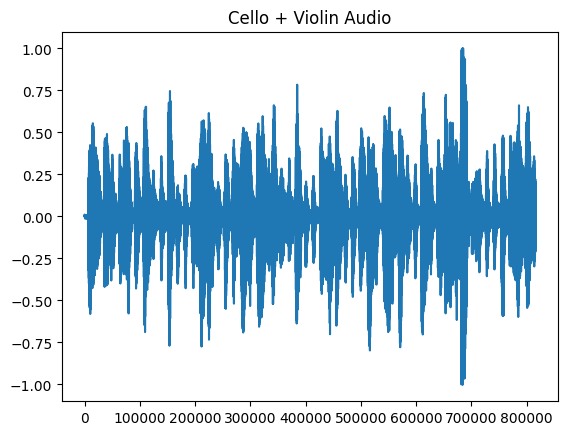

In [2]:
path = '/Users/jasonluo/Documents/JL School/ENEE469O/final_project/data_files/cello_violin_duet.wav'
mixed_signal, sample_rate = librosa.load(path, sr = None)
mixed_signal = mixed_signal[(sample_rate * 7):(sample_rate * 24)]
display(Audio(mixed_signal, rate = sample_rate))

plt.plot(mixed_signal)
plt.title('Cello + Violin Audio')
plt.show()

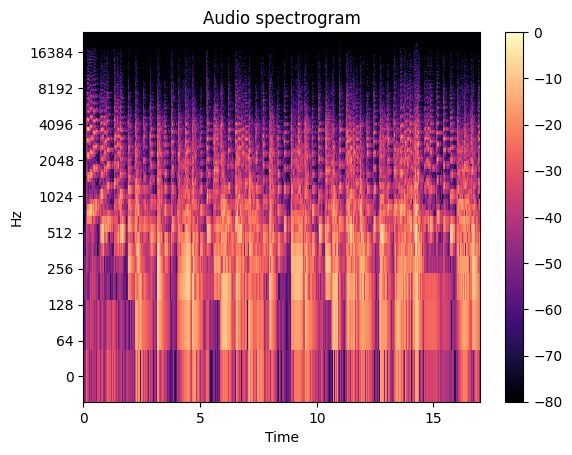

In [3]:
frame_length = 512
hop_length = int(frame_length * 0.25)
sound_stft = librosa.stft(mixed_signal, n_fft=frame_length, hop_length=hop_length)

sound_stft_Magnitude = np.abs(sound_stft)
sound_stft_Angle = np.angle(sound_stft) #Phase

#Plot Spectogram
Spec = librosa.amplitude_to_db(sound_stft_Magnitude, ref = np.max)
img = librosa.display.specshow(Spec,y_axis = 'log',sr=sample_rate,hop_length=hop_length,x_axis ='time')
plt.title('Audio spectrogram')
plt.colorbar(img)
plt.show()

  0%|          | 11/5000 [01:04<7:39:16,  5.52s/it]

Relative error at iteration 10: 0.002241344101872088


  0%|          | 21/5000 [02:00<8:02:19,  5.81s/it]

Relative error at iteration 20: 0.0036268787157344383


  1%|          | 31/5000 [02:59<7:55:58,  5.75s/it]

Relative error at iteration 30: 0.005856458531319342


  1%|          | 41/5000 [03:56<7:54:22,  5.74s/it]

Relative error at iteration 40: 0.00713290608952892


  1%|          | 51/5000 [04:55<8:10:38,  5.95s/it]

Relative error at iteration 50: 0.005637075110396784


  1%|          | 61/5000 [05:57<8:38:07,  6.29s/it]

Relative error at iteration 60: 0.0032971706021154186


  1%|▏         | 71/5000 [07:06<9:03:04,  6.61s/it] 

Relative error at iteration 70: 0.001758717600272721


  2%|▏         | 81/5000 [08:05<7:53:48,  5.78s/it]

Relative error at iteration 80: 0.0010676375016717


  2%|▏         | 91/5000 [09:04<8:03:59,  5.92s/it]

Relative error at iteration 90: 0.0007468585842480201


  2%|▏         | 101/5000 [10:07<8:18:36,  6.11s/it]

Relative error at iteration 100: 0.0005219675554510731


  2%|▏         | 111/5000 [11:07<7:59:33,  5.89s/it]

Relative error at iteration 110: 0.00038123433634199954


  2%|▏         | 121/5000 [12:06<7:57:18,  5.87s/it]

Relative error at iteration 120: 0.00029896654289241387


  3%|▎         | 131/5000 [13:06<8:08:16,  6.02s/it]

Relative error at iteration 130: 0.0002483055876909294


  3%|▎         | 141/5000 [14:11<8:42:28,  6.45s/it]

Relative error at iteration 140: 0.00021469096377807307


  3%|▎         | 151/5000 [15:14<8:59:13,  6.67s/it]

Relative error at iteration 150: 0.00018663814617204423


  3%|▎         | 161/5000 [16:29<8:26:40,  6.28s/it] 

Relative error at iteration 160: 0.00015953793634086824


  3%|▎         | 171/5000 [17:27<7:47:23,  5.81s/it]

Relative error at iteration 170: 0.000133945246470875


  4%|▎         | 181/5000 [18:24<7:44:10,  5.78s/it]

Relative error at iteration 180: 0.00011469162791445615


  4%|▍         | 190/5000 [19:22<8:10:24,  6.12s/it]

Relative error at iteration 190: 9.992385936398779e-05
Convergence achieved at iteration 190...


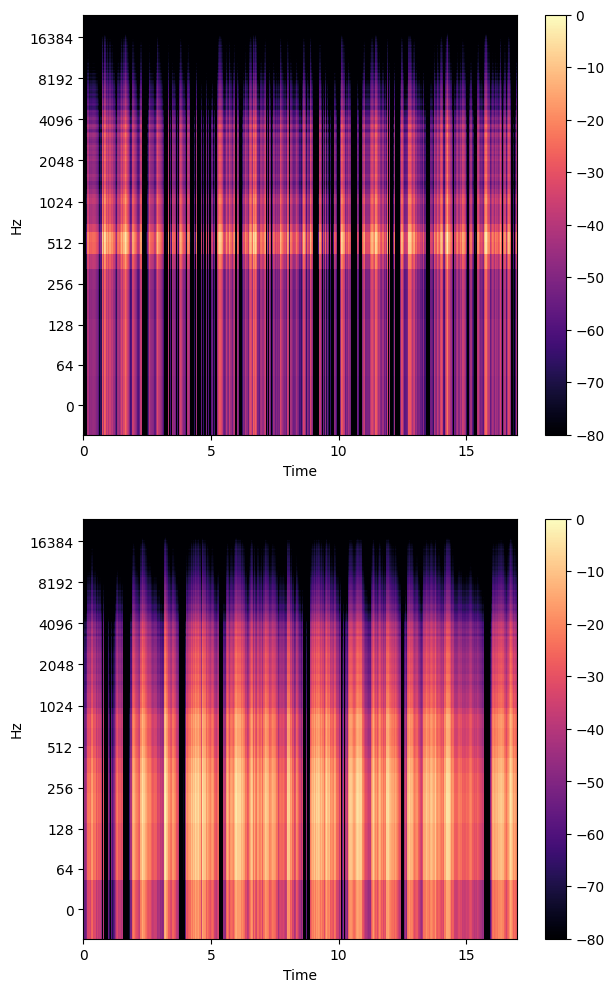

In [4]:
num_sources = 2
F, W, G_T, residual_vector = convex_nmf(sound_stft_Magnitude, num_sources, 1e-4, 5000, random_state=10)


# Constructing estimated filtered spectrograms
filtered_spectrograms = []
fig, axs = plt.subplots(num_sources, 1, figsize = [7, 12])
for i in range(0, num_sources):
    filtered_spectrogram = F[:,[i]] @ G_T[[i],:] # ith Column of W * ith row of H
    D = librosa.amplitude_to_db(filtered_spectrogram, ref = np.max)
    img = librosa.display.specshow(D,y_axis = 'log',sr=sample_rate,hop_length=hop_length,x_axis ='time', ax = axs[i])
    fig.colorbar(img)
    
    filtered_spectrograms.append(filtered_spectrogram)

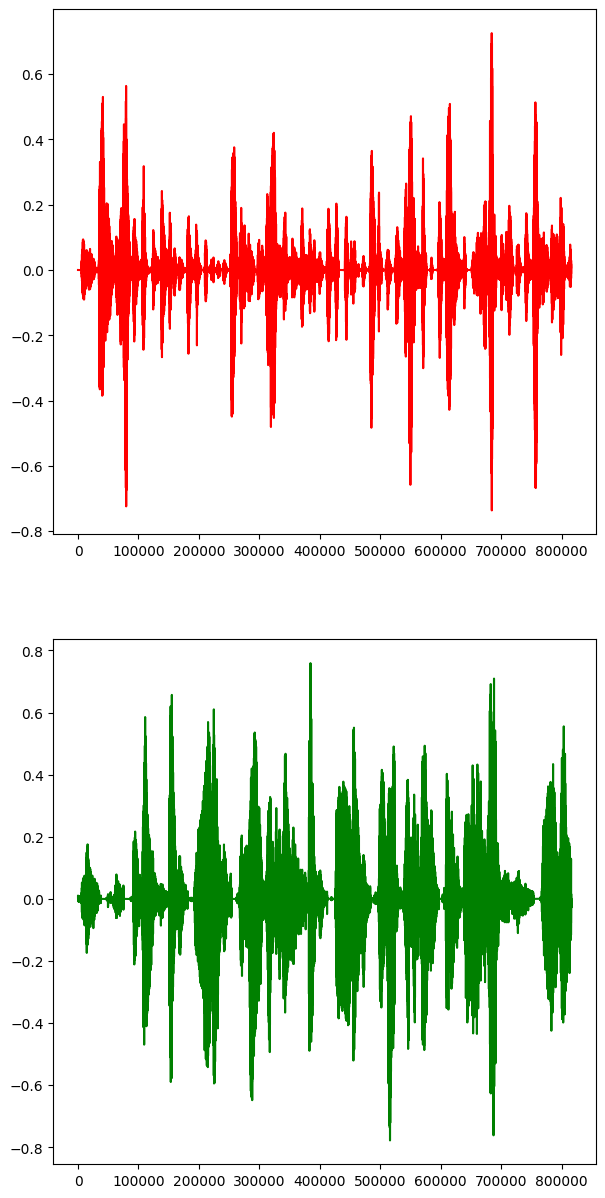

In [5]:
# Contructing source sounds using filtered spectograms and phase
new_sounds = []
colors = ['r', 'g']

fig, axs = plt.subplots(num_sources,1, figsize = [7,15])

for i in range(0, num_sources):
    reconstruct = filtered_spectrograms[i] * np.exp(1j*sound_stft_Angle)
    new_sound = librosa.istft(reconstruct, n_fft = frame_length, hop_length = hop_length)
    new_sounds.append(new_sound)
    axs[i].plot(new_sound, color = colors[i])
    
    display(Audio(new_sounds[i], rate = sample_rate))